# 分析104年台南登革熱通報人數與一些衛生指標的關係

### 資料來源：台南市政府資料開放平台
http://data.tainan.gov.tw/dataset/df-mosquito-density/resource/5021f705-ec2d-4490-b66c-355b1ffd0e77
http://data.tainan.gov.tw/dataset/denguefevercases/resource/7617bfcd-20e2-4f8d-a83b-6f6b479367f9

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression as LR

### 匯入資料

In [3]:
df_ill = pd.read_csv("/Users/USER/Desktop/dengue104.csv")
df_index = pd.read_csv("/Users/USER/Desktop/104110.csv")

### 檢查一下

In [4]:
df_ill.head()

,確診日,區別,里別,道路名稱,經度座標,緯度座標
0,2015/1/6,關廟區,南花里,明德街,120.234,22.987
1,2015/1/19,東區,文聖里,裕文路,120.197,22.979
2,2015/5/21,北區,六甲里,和緯路,120.198,22.997
3,2015/5/24,北區,六甲里,和緯路,120.198,22.997
4,2015/6/4,北區,六甲里,和緯路,120.209,23.005


In [5]:
df_index.head()

,日期,區別,里別,調查種類,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數(戶內),陽性容器數(戶外),布氏指數,布氏級數,容器指數,容器級數
0,104/1/11,安定區,海寮里,住宅,50,0,0,4,0,0,0,0,0,0
1,104/1/13,安定區,安定里,住宅,50,0,0,4,0,0,0,0,0,0
2,104/1/16,安定區,海寮里,住宅,50,0,0,5,0,0,0,0,0,0
3,104/1/20,安定區,保西里,住宅,50,0,0,9,0,0,0,0,0,0
4,104/1/22,安定區,新吉里,住宅,50,0,0,4,0,0,0,0,0,0


### 依照各區排序

In [6]:
df_ill = df_ill.sort_values(by=['區別'])
df_index = df_index.sort_values(by=['區別'])

### 再次檢查

In [7]:
df_ill.head()

,確診日,區別,里別,道路名稱,經度座標,緯度座標
12700,2015/9/22,七股區,大潭里,大潭里,120.134,23.187
5914,2015/9/8,七股區,大寮里,NaN,120.149,23.149
17530,2015/10/4,七股區,樹林里,樹林里,120.217,22.980
19500,2015/10/12,七股區,十份里,十份里,120.099,23.094
3488,2015/9/1,七股區,中寮里,NaN,120.109,23.155


In [8]:
df_index.head()

,日期,區別,里別,調查種類,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數(戶內),陽性容器數(戶外),布氏指數,布氏級數,容器指數,容器級數
4139,104/8/24,七股區,義合里,住宅,78,1,0,38,0,4,5,2,11,4
4158,104/9/15,七股區,城內里,住宅,35,1,0,12,0,1,3,1,8,3
4157,104/9/15,七股區,十份里,住宅,50,1,0,9,0,2,4,1,22,6
4156,104/9/14,七股區,玉成里,住宅,61,1,0,11,0,1,2,1,9,3
4155,104/9/12,七股區,溪南里,住宅,60,1,0,40,0,2,3,1,5,2


### 我們希望可以依照各區把一些資料作合併（例如各區通報總人數、各區調查總戶數...）

In [9]:
df_index.dtypes #確認資料類型是可以運算的

日期           object
區別           object
里別           object
調查種類         object
調查戶數          int64
陽性戶數          int64
調查容器數(戶內)     int64
調查容器數(戶外)     int64
陽性容器數(戶內)     int64
陽性容器數(戶外)     int64
布氏指數          int64
布氏級數          int64
容器指數          int64
容器級數          int64
dtype: object

In [13]:
df_index = df_index.groupby('區別').sum() #資料合併

In [14]:
df_index.head() #double check

,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數(戶內),陽性容器數(戶外),布氏指數,布氏級數,容器指數,容器級數
區別,,,,,,,,,,
七股區,6979,28,7,2158,0,52,64,31,209,77
下營區,4192,14,26,1104,0,36,48,17,141,42
中西區,42895,994,5890,8305,329,920,2271,635,5708,1613
仁德區,8448,67,514,1270,8,110,181,49,551,134
佳里區,3254,20,69,522,8,32,83,24,375,73


In [15]:
df_index = df_index.drop('北門區',axis=0) #由於北門區沒有通報病例，為了避免空值影響分析結果，決定刪除指數資料中北門區的資料

In [16]:
df_index_1 = df_index.reset_index(drop=True) #重設index

In [17]:
df_index_1.head() #double check

,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數(戶內),陽性容器數(戶外),布氏指數,布氏級數,容器指數,容器級數
0,6979,28,7,2158,0,52,64,31,209,77
1,4192,14,26,1104,0,36,48,17,141,42
2,42895,994,5890,8305,329,920,2271,635,5708,1613
3,8448,67,514,1270,8,110,181,49,551,134
4,3254,20,69,522,8,32,83,24,375,73


In [18]:
df_add = df_ill['區別'].value_counts() #依各區別加總通報病例總數

In [19]:
df_add_count = pd.DataFrame(df_add)
df_add_count = df_add_count.reset_index()
df_add_count.columns = ['區別', '人數'] #將剛剛的總數另外設成一個dataframe

In [20]:
df_add_count.head() #檢查看看

,區別,人數
0,北區,5772
1,南區,3529
2,中西區,3492
3,東區,3141
4,永康區,2703


In [58]:
df_add_count = df_add_count.sort_values(by=['區別'])
df_add_count = df_add_count.reset_index(drop=True) #依照區別排序並重設index

In [59]:
df = pd.concat([df_add_count,df_index_1],axis=1) #合併病例數目資料與指數資料

In [60]:
df.head() #檢查看看

,區別,人數,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數(戶內),陽性容器數(戶外),布氏指數,布氏級數,容器指數,容器級數
0,七股區,21,6979,28,7,2158,0,52,64,31,209,77
1,下營區,16,4192,14,26,1104,0,36,48,17,141,42
2,中西區,3492,42895,994,5890,8305,329,920,2271,635,5708,1613
3,仁德區,305,8448,67,514,1270,8,110,181,49,551,134
4,佳里區,69,3254,20,69,522,8,32,83,24,375,73


### 由於有些指標資料不可以直接加總，因此我們需要重新計算
### 部分指標公式如下：
    布氏指數：陽性容器數(戶內+戶外) / 調查戶數 x100
    陽性戶數比例：陽性戶數 / 調查戶數 x100

In [61]:
df = df.rename({'陽性容器數(戶內)':'陽性容器數_戶內', '陽性容器數(戶外)':'陽性容器數_戶外'}, axis=1) #括號會影響，先重新命名

In [62]:
df['比例']=df.陽性戶數*100/df.調查戶數
df['陽性容器數']=df.陽性容器數_戶內+df.陽性容器數_戶外
df['布氏指數_R']=df.陽性容器數*100/df.調查戶數

In [63]:
df.head() #檢查新資料

,區別,人數,調查戶數,陽性戶數,調查容器數(戶內),調查容器數(戶外),陽性容器數_戶內,陽性容器數_戶外,布氏指數,布氏級數,容器指數,容器級數,比例,陽性容器數,布氏指數_R
0,七股區,21,6979,28,7,2158,0,52,64,31,209,77,0.401204,52,0.745092
1,下營區,16,4192,14,26,1104,0,36,48,17,141,42,0.333969,36,0.858779
2,中西區,3492,42895,994,5890,8305,329,920,2271,635,5708,1613,2.317286,1249,2.911761
3,仁德區,305,8448,67,514,1270,8,110,181,49,551,134,0.793087,118,1.396780
4,佳里區,69,3254,20,69,522,8,32,83,24,375,73,0.614628,40,1.229256


### 開始分析資料

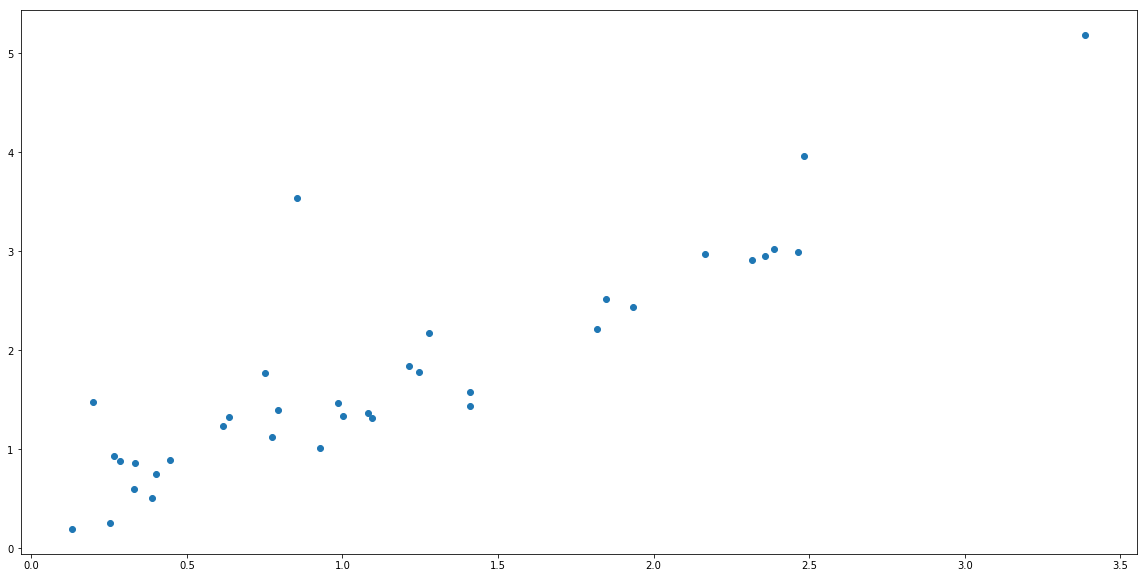

In [64]:
y=df.布氏指數_R
x=df.比例
plt.figure(figsize=(20,10))
plt.scatter(x,y)

### 可以看到修正後的布氏指數，與陽性戶數略呈線性關係
### 我們試著加上回歸直線

In [65]:
X = x.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


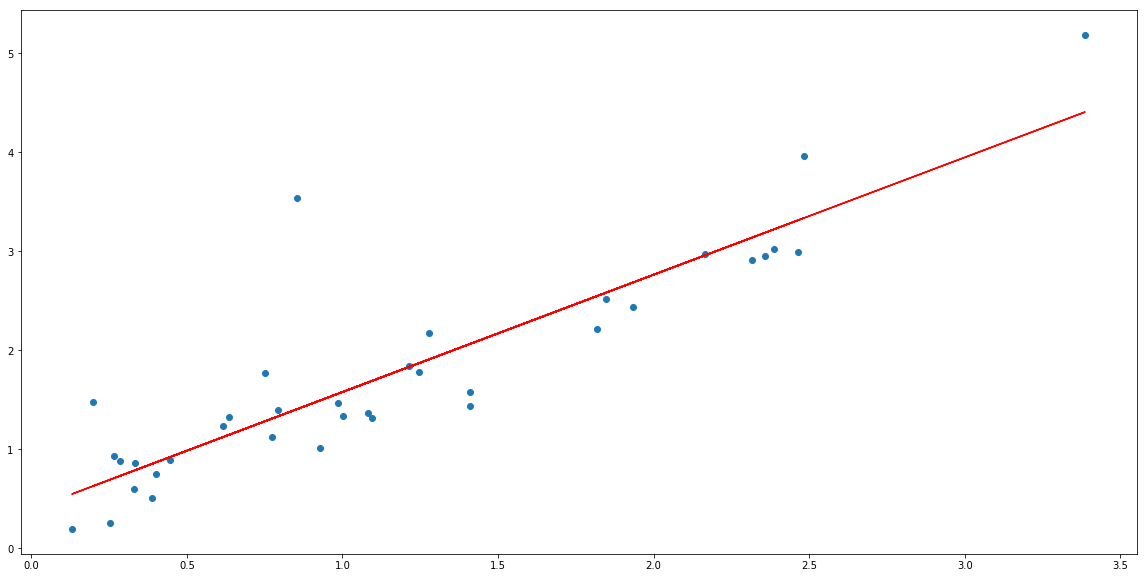

In [66]:
X = X.reshape(len(X),1)
regr.fit(X,y)
Y = regr.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,Y,'r')

### 效果不錯
### 下一步試著分析通報人數與一些指標的關係

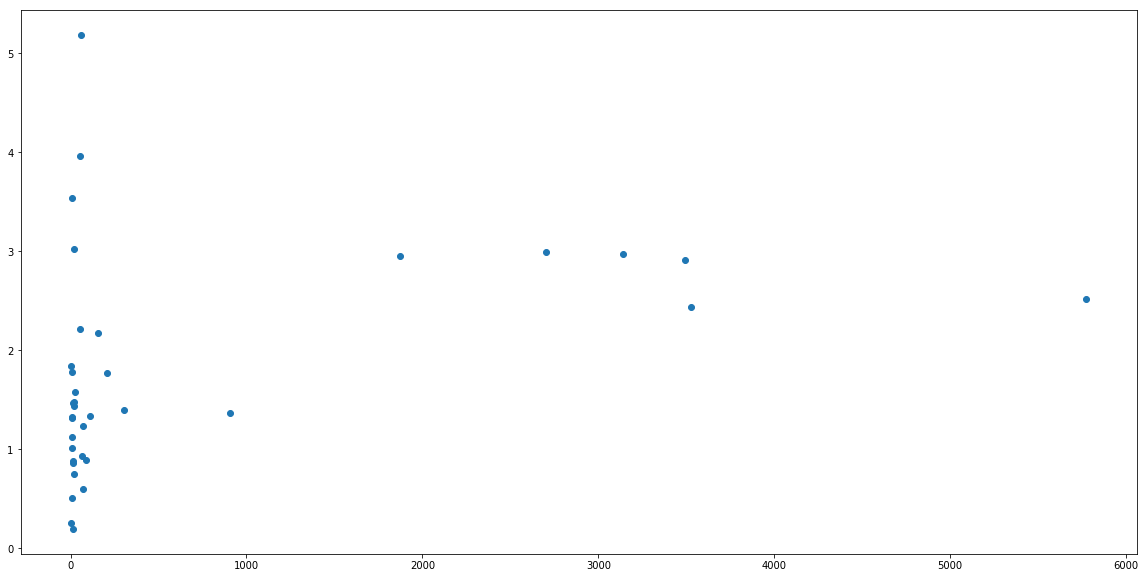

In [67]:
x=df.人數
y=df.布氏指數_R
plt.figure(figsize=(20,10))
plt.scatter(x,y)

### 看起來各區域的通報人數差異過大，並無法看出顯著的關係
### 試著對人數取對數看看

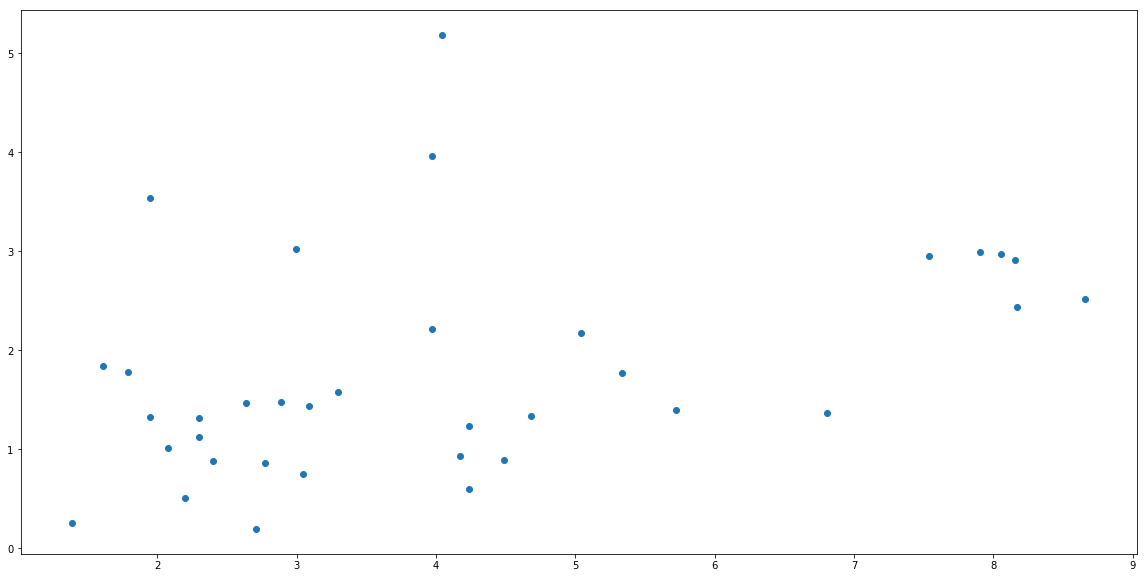

In [68]:
x=np.log(df.人數)
y=df.布氏指數_R
plt.figure(figsize=(20,10))
plt.scatter(x,y)

### 看起來還是很不好
### 換一個指標來分析看看

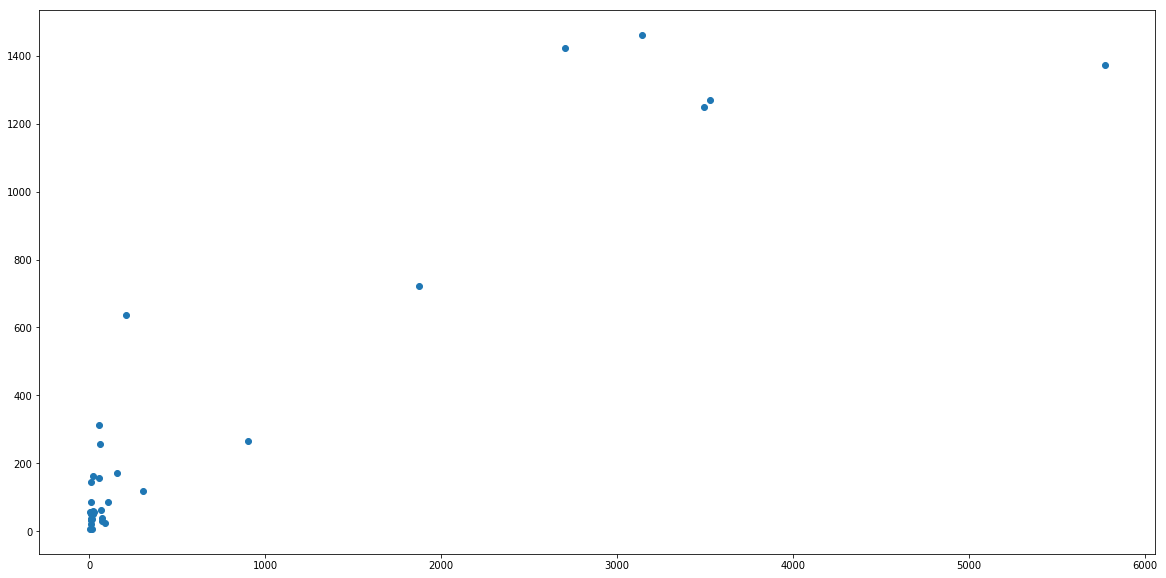

In [70]:
x=df.人數
y=df.陽性容器數
plt.figure(figsize=(20,10))
plt.scatter(x,y)

### 比剛才好一點點，試著畫看看回歸直線

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


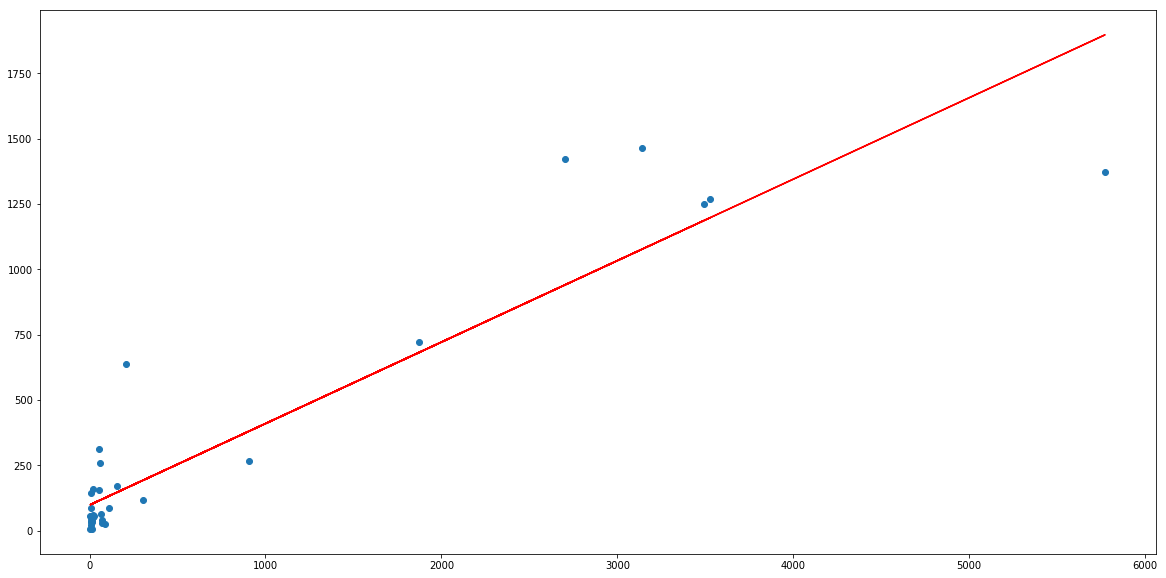

In [71]:
X = x.as_matrix()
X = X.reshape(len(X),1)
regr.fit(X,y)
Y = regr.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,Y,'r')

### 看來通報人數與陽性容器數有一定程度的關係

### 結語：104年台南市的登革熱疫情十分嚴重，希望可以從這次的分析中，觀察到一些衛生方面必須注意的事項。從平時的環境改善著手，或許未來夏季就可以降低登革熱帶來的影響。